In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ml 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
# get data
df = pd.read_csv("/Users/nolanpestano/Documents/GitHub/IT3040/Project1-nrpw88/shopping.csv") # absoluet path bc im lazy

print(df.head())

columns_to_normalize = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
    "Browser",
    "Region",
    "TrafficType",
    "OperatingSystems",
    "Month",
    "VisitorType"
]

# confusion matrix
def get_confusion_matrix(model, X_test, y_test):
    x = confusion_matrix(y_test, model.predict(X_test) >= 0.5)
    print(f" total correct : {x[0][0] + x[1][1]}")
    return x

def plot_confusion_matrix(model, X_test, y_test):
    cm = get_confusion_matrix(model, X_test, y_test)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    # scores because im too lazy to copy and paste a new function when thsi is present
    
    print(f"Precision: {precision_score(y_test, model.predict(X_test) >= 0.5)}")
    print(f"Recall: {recall_score(y_test, model.predict(X_test) >= 0.5)}")
    print(f"F1: {f1_score(y_test, model.predict(X_test) >= 0.5)}")
    

   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   
3               2               141.000000              0   
4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0   Nov                 1   
1     0.002198   0.004916    2.086218         0.0   Mar   

In [3]:
# transformations from last proj

# stuff to transform strings into text
# described in the assignment

months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "June": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

visitor_types = {
    "Returning_Visitor": 1,
    "New_Visitor": 2,
    "Other": 3
}
print(df.head())
df["Month"] = df["Month"].map(months)
df["VisitorType"] = df["VisitorType"].map(visitor_types)

# super cool way to conver bools to ints 
# https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)
print("-----")
print(df.head())

# scaling from scykit learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we'll scale every column thats not the binary (revenue and features)

features = df.drop(columns=["Revenue"])
y = df["Revenue"]

# print(df.head())
# apply the scaler to the columns we want to normalize
features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

# better naming consistent to standards
X = features


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#look at the first X row
features.head()

# bingo


   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   
3               2               141.000000              0   
4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0   Nov                 1   
1     0.002198   0.004916    2.086218         0.0   Mar   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.211736,0.352064,-0.387872,-0.237167,0.357860,-0.069031,-0.376478,-0.619388,-0.314427,-0.313118,0.995789,-1.227701,3.262510,1.177217,1.716364,-0.399326,0
1,1.112739,2.008648,1.146433,1.318397,1.135092,0.622058,-0.419455,-0.782413,-0.200199,-0.313118,-1.359714,-0.155660,-0.206646,-0.067462,-0.513002,-0.399326,0
2,-0.388933,-0.217421,-0.387872,-0.237167,2.089977,1.481915,-0.449638,-0.623814,-0.125468,-0.313118,0.995789,-0.155660,-0.206646,-0.482354,-0.513002,-0.399326,0
3,-0.088599,0.343638,-0.387872,-0.237167,-0.485992,-0.281167,-0.296813,-0.351694,1.693524,-0.313118,0.112475,-0.155660,1.527932,1.592109,-0.017587,-0.399326,0
4,4.716753,2.967847,4.215043,4.608822,3.022656,1.785842,-0.330825,-0.609679,0.241360,-0.313118,0.112475,-0.155660,-0.206646,-0.067462,-0.760709,-0.399326,1


## our data looks great, lets split into test samples
we'll use a 60 20 20 split, of training, cv, and test respectively

In [4]:
# scy kit does a lot of the work for us

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



# should be 3000, 1000, 1000
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")

X_train shape: (3000, 17)
X_test shape: (1000, 17)
X_cv shape: (1000, 17)
y_train shape: (3000,)
y_test shape: (1000,)
y_cv shape: (1000,)


### next step is to actually construct the model

In [5]:
# we have the will to test different model structures
# for now lets start with a baseline

my_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# mean squared error is a fair enough choice
# compile the model
my_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

# fit the model
history = my_model.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

# history data
print(history.history.keys())


Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8487 - val_loss: 0.3837 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 840us/step - loss: 0.3579 - accuracy: 0.8513 - val_loss: 0.3401 - val_accuracy: 0.8440
Epoch 3/100
94/94 [==============================] - 0s 716us/step - loss: 0.3257 - accuracy: 0.8560 - val_loss: 0.3189 - val_accuracy: 0.8520
Epoch 4/100
94/94 [==============================] - 0s 767us/step - loss: 0.3049 - accuracy: 0.8690 - val_loss: 0.3051 - val_accuracy: 0.8580
Epoch 5/100
94/94 [==============================] - 0s 829us/step - loss: 0.2897 - accuracy: 0.8760 - val_loss: 0.2963 - val_accuracy: 0.8680
Epoch 6/100
94/94 [==============================] - 0s 792us/step - loss: 0.2784 - accuracy: 0.8800 - val_loss: 0.2912 - val_accuracy: 0.8650
Epoch 7/100
94/94 [==============================] - 0s 711us/step - loss: 0.2702 - accuracy: 0.8830 - val_loss: 0.2868 - val_accuracy: 0.8710
E

differnece between train and validation loss: -0.09654679894447327
32/32 [==============================] - 0s 443us/step


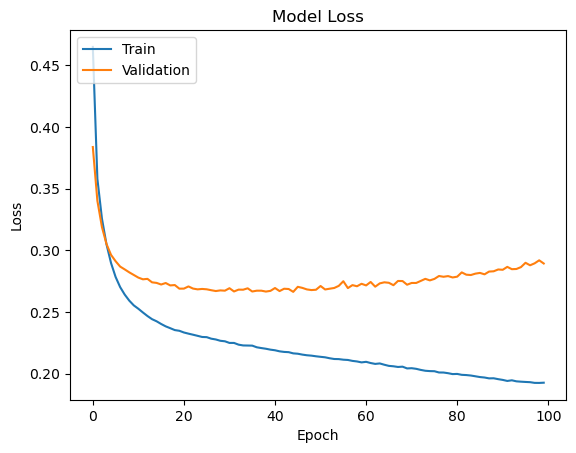

In [6]:
# summary for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"differnece between train and validation loss: {history.history['loss'][-1] - history.history['val_loss'][-1]}")

cnf = confusion_matrix(y_test, my_model.predict(X_test) >= 0.5)

32/32 [==============================] - 0s 450us/step
 total correct : 880


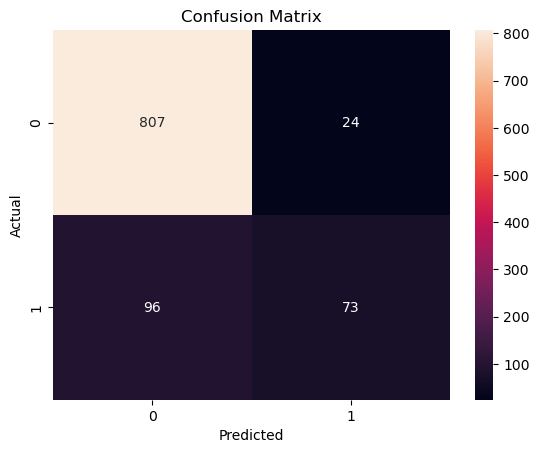

32/32 [==============================] - 0s 354us/step
Precision: 0.7525773195876289
32/32 [==============================] - 0s 336us/step
Recall: 0.4319526627218935
32/32 [==============================] - 0s 316us/step
F1: 0.5488721804511278


In [7]:
plot_confusion_matrix(my_model, X_test, y_test)

## because our model's loss is increasing in the validation set, while our loss for training decreases, this is an ***overfit*** model
 we can combat this by adding regularization

In [8]:
new_and_improved = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.01)), 
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

new_and_improved.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

new_history = new_and_improved.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

    

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.8140 - val_loss: 0.7154 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 756us/step - loss: 0.6166 - accuracy: 0.8517 - val_loss: 0.5626 - val_accuracy: 0.8440
Epoch 3/100
94/94 [==============================] - 0s 735us/step - loss: 0.5042 - accuracy: 0.8563 - val_loss: 0.4835 - val_accuracy: 0.8530
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8690 - val_loss: 0.4339 - val_accuracy: 0.8610
Epoch 5/100
94/94 [==============================] - 0s 897us/step - loss: 0.3986 - accuracy: 0.8783 - val_loss: 0.4019 - val_accuracy: 0.8670
Epoch 6/100
94/94 [==============================] - 0s 852us/step - loss: 0.3720 - accuracy: 0.8833 - val_loss: 0.3790 - val_accuracy: 0.8660
Epoch 7/100
94/94 [==============================] - 0s 730us/step - loss: 0.3528 - accuracy: 0.8877 - val_loss: 0.3629 - val_accuracy: 0.8680
Epo

differnece between train and validation loss: -0.02619144320487976


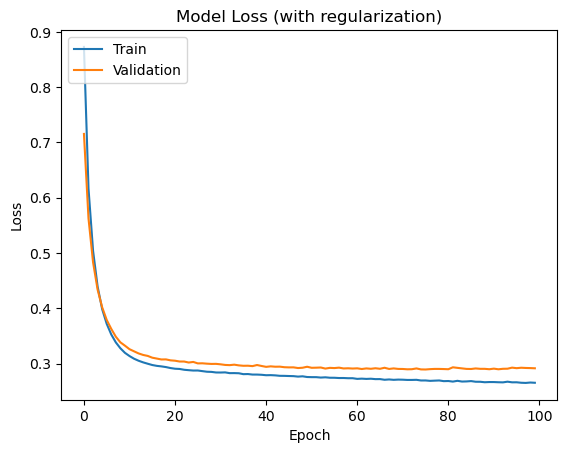

In [9]:
# new history data

plt.plot(new_history.history["loss"])
plt.plot(new_history.history["val_loss"])
plt.title("Model Loss (with regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"differnece between train and validation loss: {new_history.history['loss'][-1] - new_history.history['val_loss'][-1]}")


32/32 [==============================] - 0s 363us/step
 total correct : 873


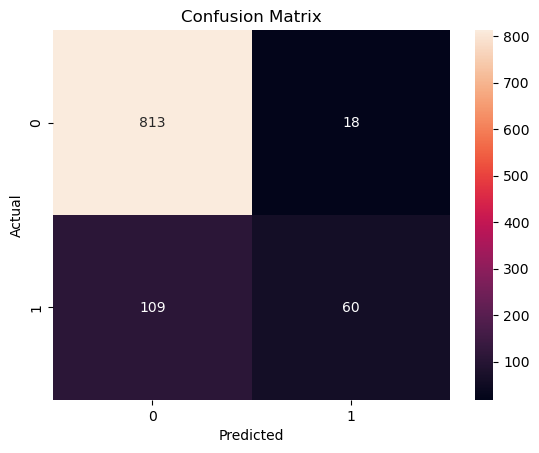

32/32 [==============================] - 0s 347us/step
Precision: 0.7692307692307693
32/32 [==============================] - 0s 304us/step
Recall: 0.35502958579881655
32/32 [==============================] - 0s 283us/step
F1: 0.4858299595141701


In [10]:
plot_confusion_matrix(new_and_improved, X_test, y_test)

### sweet! our cross validation and training are now much closer
lets increase the reg and see how that goes

In [11]:
maybe_more_improved = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
])

maybe_more_improved.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

another_new_history = new_and_improved.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)
    

Epoch 1/100
94/94 [==============================] - 0s 848us/step - loss: 0.2645 - accuracy: 0.8947 - val_loss: 0.2941 - val_accuracy: 0.8780
Epoch 2/100
94/94 [==============================] - 0s 760us/step - loss: 0.2643 - accuracy: 0.8947 - val_loss: 0.2916 - val_accuracy: 0.8820
Epoch 3/100
94/94 [==============================] - 0s 862us/step - loss: 0.2648 - accuracy: 0.8923 - val_loss: 0.2913 - val_accuracy: 0.8810
Epoch 4/100
94/94 [==============================] - 0s 850us/step - loss: 0.2653 - accuracy: 0.8940 - val_loss: 0.2919 - val_accuracy: 0.8800
Epoch 5/100
94/94 [==============================] - 0s 738us/step - loss: 0.2649 - accuracy: 0.8937 - val_loss: 0.2922 - val_accuracy: 0.8790
Epoch 6/100
94/94 [==============================] - 0s 724us/step - loss: 0.2647 - accuracy: 0.8943 - val_loss: 0.2913 - val_accuracy: 0.8770
Epoch 7/100
94/94 [==============================] - 0s 703us/step - loss: 0.2650 - accuracy: 0.8933 - val_loss: 0.2912 - val_accuracy: 0.8830

difference between train loss and validation loss: 0.25616222620010376 - 0.29621899127960205


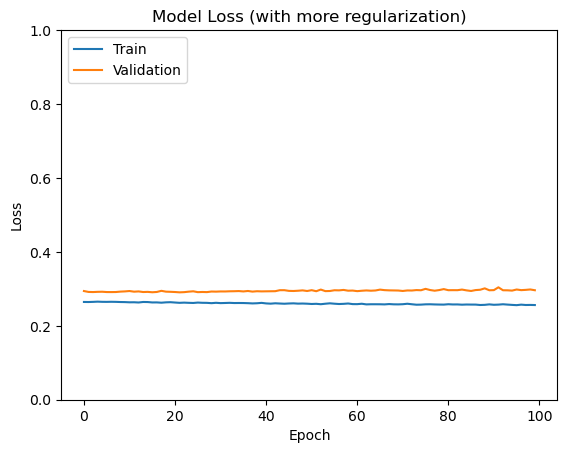

In [12]:
another_new_history.history.keys()
plt.plot(another_new_history.history["loss"])
plt.plot(another_new_history.history["val_loss"])
plt.title("Model Loss (with more regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
# change the range on the y axis
plt.ylim(0, 1)
print(f"difference between train loss and validation loss: {another_new_history.history['loss'][-1]} - {another_new_history.history['val_loss'][-1]}")

32/32 [==============================] - 0s 409us/step
 total correct : 831


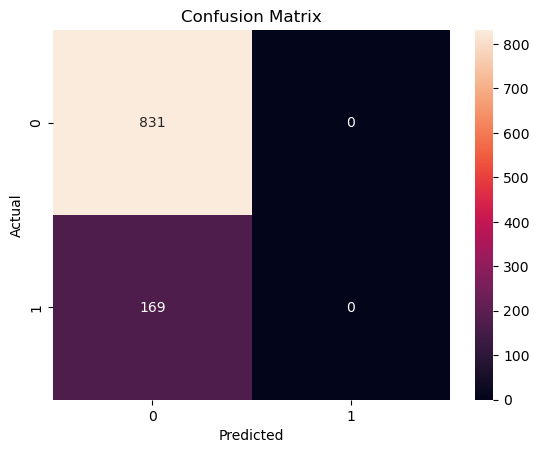

32/32 [==============================] - 0s 360us/step
Precision: 0.0
32/32 [==============================] - 0s 406us/step
Recall: 0.0
32/32 [==============================] - 0s 340us/step
F1: 0.0


/Users/nolanpestano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
plot_confusion_matrix(maybe_more_improved, X_test, y_test)

### right so our regularization is too high at .1! we can see that because our loss really isnt changing. these results were worse than the other .01 actually!

since our .01 was good for regurlaztion, what if we do .001?

In [14]:
smaller_reg = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1)
])

smaller_reg.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

smaller_history = smaller_reg.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)
    

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8500 - val_loss: 0.4589 - val_accuracy: 0.8440
Epoch 2/100
94/94 [==============================] - 0s 715us/step - loss: 0.4113 - accuracy: 0.8547 - val_loss: 0.3758 - val_accuracy: 0.8560
Epoch 3/100
94/94 [==============================] - 0s 716us/step - loss: 0.3516 - accuracy: 0.8663 - val_loss: 0.3432 - val_accuracy: 0.8620
Epoch 4/100
94/94 [==============================] - 0s 706us/step - loss: 0.3254 - accuracy: 0.8820 - val_loss: 0.3293 - val_accuracy: 0.8660
Epoch 5/100
94/94 [==============================] - 0s 682us/step - loss: 0.3133 - accuracy: 0.8870 - val_loss: 0.3216 - val_accuracy: 0.8740
Epoch 6/100
94/94 [==============================] - 0s 673us/step - loss: 0.3051 - accuracy: 0.8887 - val_loss: 0.3156 - val_accuracy: 0.8720
Epoch 7/100
94/94 [==============================] - 0s 670us/step - loss: 0.2989 - accuracy: 0.8923 - val_loss: 0.3105 - val_accuracy: 0.8770
E

(0.0, 1.0)

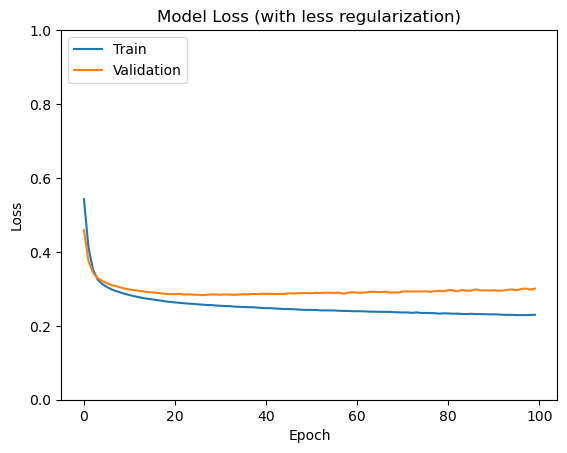

In [15]:
plt.plot(smaller_history.history["loss"])
plt.plot(smaller_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 350us/step
 total correct : 881


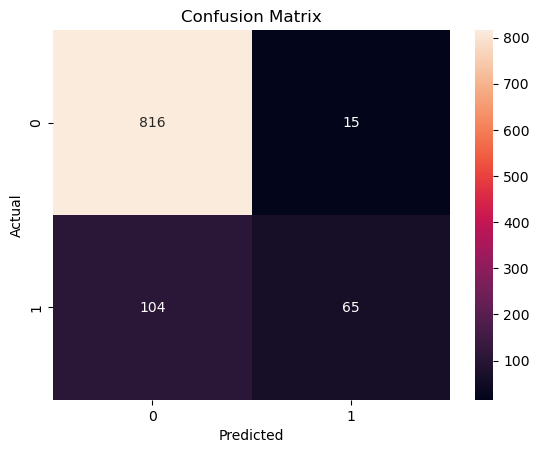

32/32 [==============================] - 0s 385us/step
Precision: 0.8125
32/32 [==============================] - 0s 341us/step
Recall: 0.38461538461538464
32/32 [==============================] - 0s 393us/step
F1: 0.5220883534136547


In [16]:
plot_confusion_matrix(smaller_reg, X_test, y_test)

### not fantastic either

so we can conclude that .01 is a good regularization term, what happens if we change then activation?
lets try removing a layer or two

In [17]:
new_activation = keras.Sequential([
    keras.layers.Dense(16, activation="sigmoid", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation="sigmoid", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1),
])

new_activation.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

new_activation_history = new_activation.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)
    

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8673 - accuracy: 0.5920 - val_loss: 0.6219 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 712us/step - loss: 0.5290 - accuracy: 0.8510 - val_loss: 0.4765 - val_accuracy: 0.8450
Epoch 3/100
94/94 [==============================] - 0s 736us/step - loss: 0.4473 - accuracy: 0.8510 - val_loss: 0.4371 - val_accuracy: 0.8450
Epoch 4/100
94/94 [==============================] - 0s 717us/step - loss: 0.4197 - accuracy: 0.8510 - val_loss: 0.4198 - val_accuracy: 0.8450
Epoch 5/100
94/94 [==============================] - 0s 667us/step - loss: 0.4050 - accuracy: 0.8510 - val_loss: 0.4085 - val_accuracy: 0.8450
Epoch 6/100
94/94 [==============================] - 0s 700us/step - loss: 0.3944 - accuracy: 0.8510 - val_loss: 0.3995 - val_accuracy: 0.8450
Epoch 7/100
94/94 [==============================] - 0s 724us/step - loss: 0.3858 - accuracy: 0.8510 - val_loss: 0.3916 - val_accuracy: 0.8450
E

(0.0, 1.0)

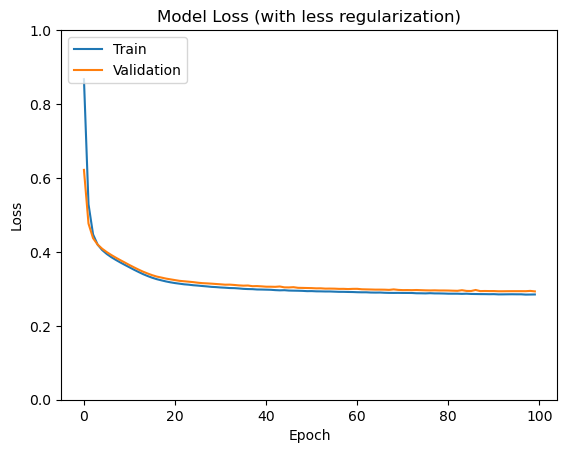

In [18]:
plt.plot(new_activation_history.history["loss"])
plt.plot(new_activation_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 346us/step
 total correct : 869


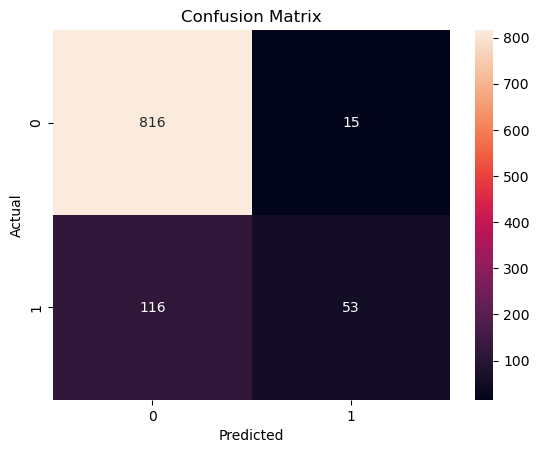

32/32 [==============================] - 0s 463us/step
Precision: 0.7794117647058824
32/32 [==============================] - 0s 353us/step
Recall: 0.3136094674556213
32/32 [==============================] - 0s 349us/step
F1: 0.44725738396624476


In [19]:
plot_confusion_matrix(new_activation, X_test, y_test)

### sigmoid provides a comparable result to relu!

relu is pretty darn fast and scales nicely so we'll stick there though

## what happens on changing the architecture? 
lets knock out that hidden layer 

In [20]:
no_hidden_layer = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1),
]) 

no_hidden_layer.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

no_hidden_layer_history = no_hidden_layer.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.9770 - accuracy: 0.5693 - val_loss: 0.7281 - val_accuracy: 0.7540
Epoch 2/100
94/94 [==============================] - 0s 733us/step - loss: 0.6153 - accuracy: 0.8153 - val_loss: 0.5231 - val_accuracy: 0.8400
Epoch 3/100
94/94 [==============================] - 0s 701us/step - loss: 0.4663 - accuracy: 0.8483 - val_loss: 0.4288 - val_accuracy: 0.8440
Epoch 4/100
94/94 [==============================] - 0s 659us/step - loss: 0.3966 - accuracy: 0.8520 - val_loss: 0.3841 - val_accuracy: 0.8450
Epoch 5/100
94/94 [==============================] - 0s 714us/step - loss: 0.3607 - accuracy: 0.8547 - val_loss: 0.3576 - val_accuracy: 0.8470
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.3411 - val_accuracy: 0.8500
Epoch 7/100
94/94 [==============================] - 0s 849us/step - loss: 0.3235 - accuracy: 0.8657 - val_loss: 0.3283 - val_accuracy: 0.8560
Epo

(0.0, 1.0)

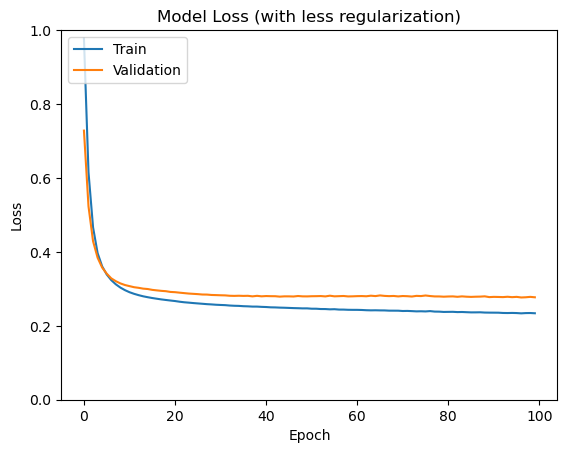

In [21]:
plt.plot(no_hidden_layer_history.history["loss"])
plt.plot(no_hidden_layer_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 512us/step
 total correct : 873


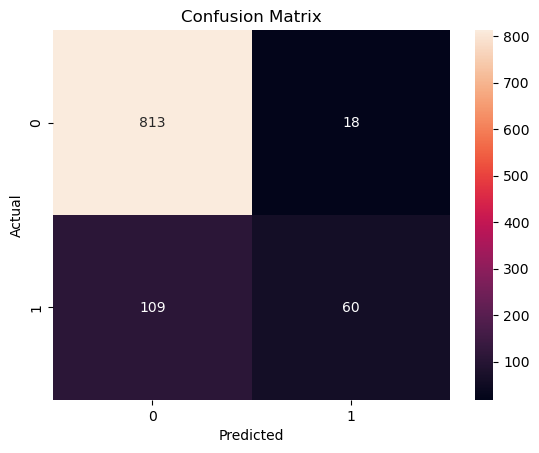

32/32 [==============================] - 0s 374us/step
Precision: 0.7692307692307693
32/32 [==============================] - 0s 358us/step
Recall: 0.35502958579881655
32/32 [==============================] - 0s 364us/step
F1: 0.4858299595141701


In [22]:
plot_confusion_matrix(no_hidden_layer, X_test, y_test)

### the results were fairly comparalbe, but the cross validation set was a bit too high
so we can say that the one hidden layer was fair enough

will adding more layers give a better result? or just diminishing return?

In [23]:
one_more_hidden_layer = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation="relu",),
    keras.layers.Dense(4, activation="relu",),
    keras.layers.Dense(1),
]) 

one_more_hidden_layer.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

more_layer_history= no_hidden_layer.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

Epoch 1/100
94/94 [==============================] - 0s 882us/step - loss: 0.2338 - accuracy: 0.9030 - val_loss: 0.2774 - val_accuracy: 0.8800
Epoch 2/100
94/94 [==============================] - 0s 668us/step - loss: 0.2331 - accuracy: 0.9037 - val_loss: 0.2776 - val_accuracy: 0.8800
Epoch 3/100
94/94 [==============================] - 0s 685us/step - loss: 0.2331 - accuracy: 0.9027 - val_loss: 0.2782 - val_accuracy: 0.8790
Epoch 4/100
94/94 [==============================] - 0s 700us/step - loss: 0.2328 - accuracy: 0.9047 - val_loss: 0.2777 - val_accuracy: 0.8800
Epoch 5/100
94/94 [==============================] - 0s 751us/step - loss: 0.2326 - accuracy: 0.9040 - val_loss: 0.2771 - val_accuracy: 0.8820
Epoch 6/100
94/94 [==============================] - 0s 729us/step - loss: 0.2328 - accuracy: 0.9037 - val_loss: 0.2777 - val_accuracy: 0.8800
Epoch 7/100
94/94 [==============================] - 0s 746us/step - loss: 0.2320 - accuracy: 0.9043 - val_loss: 0.2767 - val_accuracy: 0.8800

(0.0, 1.0)

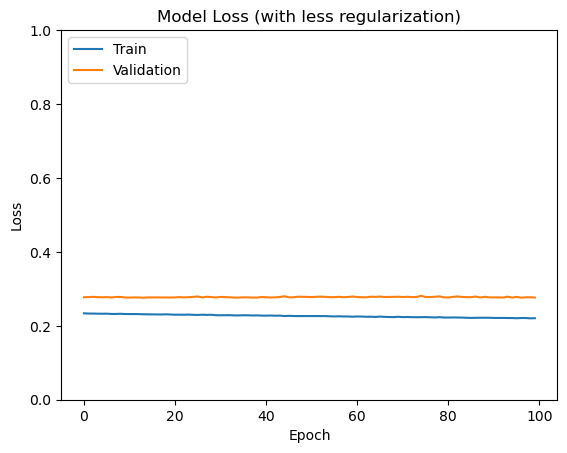

In [24]:
plt.plot(more_layer_history.history["loss"])
plt.plot(more_layer_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 415us/step
 total correct : 831


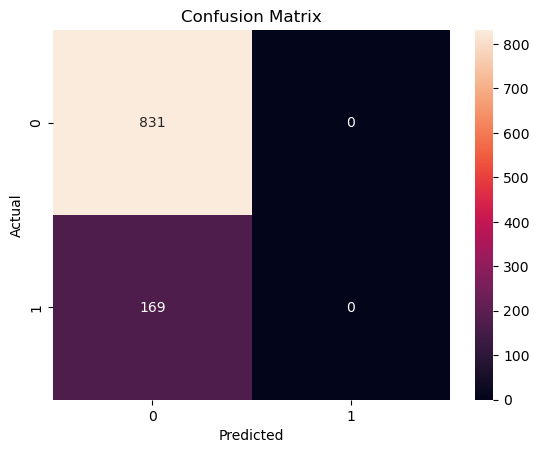

32/32 [==============================] - 0s 394us/step
Precision: 0.0
32/32 [==============================] - 0s 407us/step
Recall: 0.0
32/32 [==============================] - 0s 368us/step
F1: 0.0


/Users/nolanpestano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
plot_confusion_matrix(one_more_hidden_layer, X_test, y_test)

### meh, npt bad, but it feels like a diminsihing return. the cv example also isn't great

what about units per layer?

In [26]:
more_units = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation="relu",),
    keras.layers.Dense(1),
])

more_units.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

more_units_history = more_units.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.8420 - val_loss: 0.4053 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 765us/step - loss: 0.3600 - accuracy: 0.8547 - val_loss: 0.3328 - val_accuracy: 0.8500
Epoch 3/100
94/94 [==============================] - 0s 782us/step - loss: 0.3146 - accuracy: 0.8733 - val_loss: 0.3108 - val_accuracy: 0.8660
Epoch 4/100
94/94 [==============================] - 0s 765us/step - loss: 0.2951 - accuracy: 0.8843 - val_loss: 0.3015 - val_accuracy: 0.8770
Epoch 5/100
94/94 [==============================] - 0s 749us/step - loss: 0.2849 - accuracy: 0.8897 - val_loss: 0.2971 - val_accuracy: 0.8770
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8917 - val_loss: 0.2948 - val_accuracy: 0.8790
Epoch 7/100
94/94 [==============================] - 0s 788us/step - loss: 0.2733 - accuracy: 0.8930 - val_loss: 0.2930 - val_accuracy: 0.8780
Epo

(0.0, 1.0)

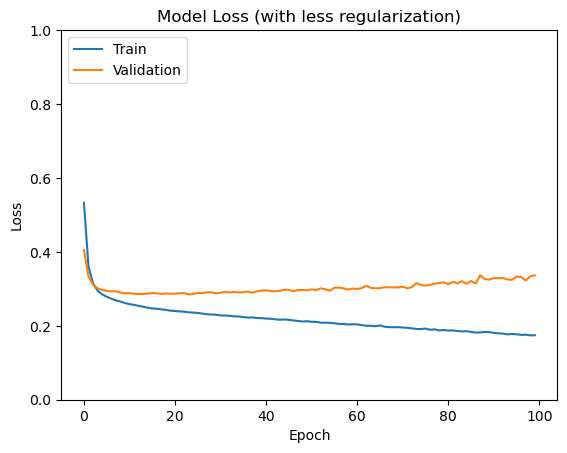

In [27]:
plt.plot(more_units_history.history["loss"])
plt.plot(more_units_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 356us/step
 total correct : 879


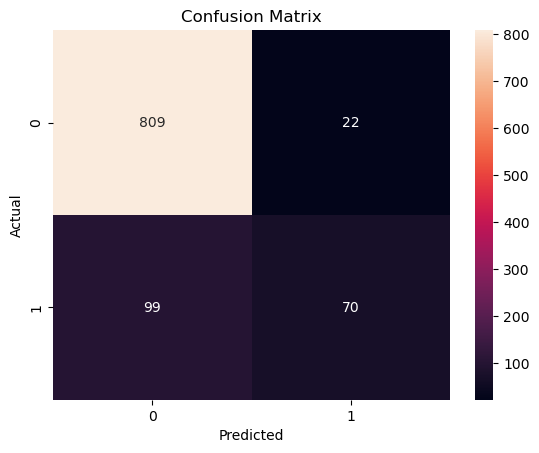

32/32 [==============================] - 0s 426us/step
Precision: 0.7608695652173914
32/32 [==============================] - 0s 374us/step
Recall: 0.41420118343195267
32/32 [==============================] - 0s 322us/step
F1: 0.5363984674329502


In [28]:
plot_confusion_matrix(more_units, X_test, y_test)

### right, not bad numbers, but extremely overfit. 

maybe adding another layer can give us a nice model?

In [29]:
more_units_and_layer = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation="relu",),
    keras.layers.Dense(8, activation="relu",),
    keras.layers.Dense(1),
])

more_units.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

more_units_layer_history = more_units.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9310 - val_loss: 0.3336 - val_accuracy: 0.8850
Epoch 2/100
94/94 [==============================] - 0s 811us/step - loss: 0.1726 - accuracy: 0.9313 - val_loss: 0.3356 - val_accuracy: 0.8840
Epoch 3/100
94/94 [==============================] - 0s 837us/step - loss: 0.1724 - accuracy: 0.9293 - val_loss: 0.3404 - val_accuracy: 0.8840
Epoch 4/100
94/94 [==============================] - 0s 808us/step - loss: 0.1704 - accuracy: 0.9300 - val_loss: 0.3419 - val_accuracy: 0.8860
Epoch 5/100
94/94 [==============================] - 0s 787us/step - loss: 0.1708 - accuracy: 0.9297 - val_loss: 0.3348 - val_accuracy: 0.8870
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9297 - val_loss: 0.3359 - val_accuracy: 0.8850
Epoch 7/100
94/94 [==============================] - 0s 815us/step - loss: 0.1687 - accuracy: 0.9337 - val_loss: 0.3399 - val_accuracy: 0.8850
Epo

(0.0, 1.0)

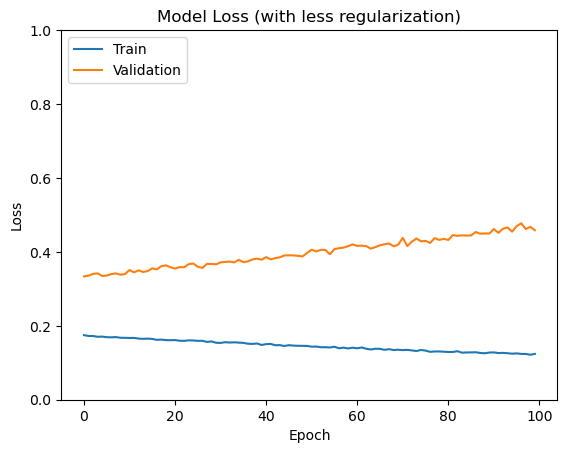

In [30]:
plt.plot(more_units_layer_history.history["loss"])
plt.plot(more_units_layer_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 386us/step
 total correct : 821


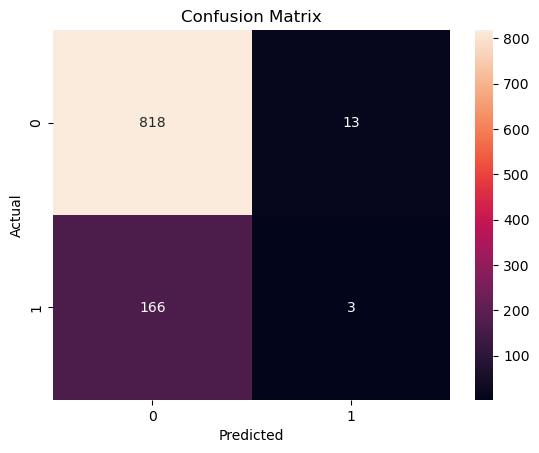

32/32 [==============================] - 0s 358us/step
Precision: 0.1875
32/32 [==============================] - 0s 360us/step
Recall: 0.01775147928994083
32/32 [==============================] - 0s 284us/step
F1: 0.032432432432432434


In [31]:
plot_confusion_matrix(more_units_and_layer, X_test, y_test)

## awful haha

our cross validation is so high, this model is incredibly overfit.

thus, i think we can conclude that the original is a pretty fair model!